In [6]:
#COMPLETE

In [1]:
import wandb, torch, utils
from ddpm_conditional import *
from modules import *

In [2]:
config

namespace(run_name='DDPM_conditional',
          epochs=100,
          noise_steps=1000,
          seed=42,
          batch_size=10,
          img_size=32,
          num_classes=10,
          dataset_path=Path('/home/ukb12/SCCDDPM/datasets/data/cifar10'),
          train_folder='train',
          val_folder='test',
          device='cuda:3',
          slice_size=1,
          do_validation=True,
          fp16=True,
          log_every_epoch=10,
          num_workers=10,
          lr=0.005)

In [3]:
seed = 42
if torch.cuda.is_available():
  generator = torch.Generator('cuda').manual_seed(seed)
else:
  generator = torch.Generator().manual_seed(seed)

In [5]:
n = 10
device = "cuda:3"
diffusion = Diffusion(img_size=32, device=device)
diffusion.load("./models/DDPM_conditional")
labels = torch.full((n,),1).long().to(diffusion.device)
sampled_images = diffusion.sample(use_ema=False, labels=labels)


cuda:3


04:28:43 - INFO: Sampling 10 new images....


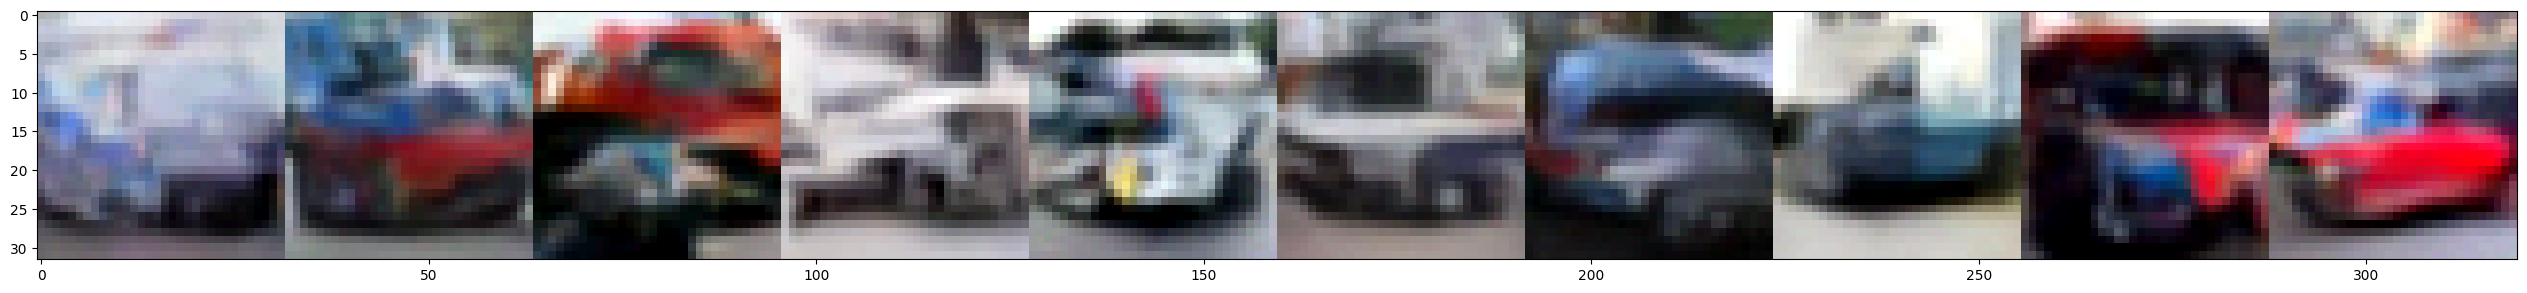

In [6]:
plot_images(sampled_images)